### Задача 1

Даны значения зарплат из выборки выпускников:

100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150.

Без использования статистических функций вроде mean, std, var, посчитать среднее арифметическое, среднее квадратичное отклонение, смещенную и несмещенную оценки дисперсий для данной выборки.

In [92]:
import warnings

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

warnings.filterwarnings('ignore')

In [93]:
salary = np.array([100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150])

In [94]:
mean_salary_formmula = sum(salary) / len(salary)
mean_salary_function = salary.mean()
print(f'среднее арифметическое по формуле равно {mean_salary_formmula}')
print(f'среднее арифметическое вычисленное функцией равно {mean_salary_function}')

среднее арифметическое по формуле равно 65.3
среднее арифметическое вычисленное функцией равно 65.3


In [95]:
std_salary_formula = np.sqrt(sum((salary - mean_salary_formmula) ** 2) / len(salary))
std_salary_function = salary.std()
print(f'среднее квадратичное отклонение по формуле равно {std_salary_formula}')
print(f'среднее квадратичное отклонение вычисленное функцией равно {std_salary_function}')

среднее квадратичное отклонение по формуле равно 30.823854398825596
среднее квадратичное отклонение вычисленное функцией равно 30.823854398825596


In [96]:
salary_variance1_formula = sum((salary - mean_salary_formmula)**2) / (len(salary))
salary_variance1_function = salary.var(ddof=0)
print(f'смещенная оценка дисперсий по формуле равно {salary_variance1_formula}')
print(f'смещенная оценка дисперсий вычисленное функцией равно {salary_variance1_function}')

смещенная оценка дисперсий по формуле равно 950.11
смещенная оценка дисперсий вычисленное функцией равно 950.11


In [97]:
salary_variance2_formula = sum((salary - mean_salary_formmula)**2) / (len(salary)-1)
salary_variance2_function = salary.var(ddof=1)
print(f'несмещенная оценка дисперсий по формуле равно {salary_variance2_formula}')
print(f'несмещенная оценка дисперсий вычисленное функцией равно {salary_variance2_function}')

несмещенная оценка дисперсий по формуле равно 1000.1157894736842
несмещенная оценка дисперсий вычисленное функцией равно 1000.1157894736842


### Задача 2
Для выборки из задачи 1 найти первый и третий квартили, интерквартильное расстояние. Найти выборсы в выборке, используя для этого "усы" из boxplot. В этой задаче можно использовать статистические функции.

In [109]:
df_salary = pd.DataFrame(salary)
q1 = df_salary[0].quantile(0.25)
q3 = df_salary[0].quantile(0.75)
print(f'первый квартиль {q1}')
print(f'третий квартиль {q3}')

первый квартиль 42.0
третий квартиль 81.0


<AxesSubplot:>

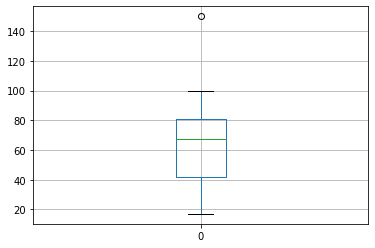

In [99]:
df_salary.boxplot()

In [111]:
# интеквартильный размах
iqr = q3 - q1
boxplot_range = (q1 - 1.5 * iqr, q3 + 1.5 * iqr)
boxplot_range

(-16.5, 139.5)

In [101]:
outliers = df_salary.loc[(df_salary[0] < boxplot_range[0]) | (df_salary[0] > boxplot_range[1])]

print(f'Выбросы: {outliers[0].value_counts()}')

Выбросы: 150    1
Name: 0, dtype: int64


### Задача 3

В университет на факультеты A и B поступило равное количество студентов, а на факультет C студентов поступило столько же, сколько на A и B вместе. Вероятность того, что студент факультета A сдаст первую сессию, равна 0.8. Для студента факультета B эта вероятность равна 0.7, а для студента факультета C - 0.9. Студент сдал первую сессию. Какова вероятность, что он учится: a) на факультете A? б) на факультете B? в) на факультете C?

Замечание: да, эта задача не на тему описательных статистик, но тема важная, и её стоит иногда освежать в памяти.

$$P(A) = P(B_1) \cdot P(A\:|\:B_1) + P(B_2) \cdot P(A\:|\:B_2) \; + ... + \; P(B_n) \cdot P(A\:|\:B_n)$$

#### вероятность того, что студент принадлежит факультету А: 
$P(B_1) = 0.25$
#### вероятность того, что студент принадлежит факультету B:
$P(B_2) = 0.25$
#### вероятность того, что студент принадлежит факультету C:
$P(B_3) = 0.5$


#### по условию задачи вероятность сдачи сессии для студента группы A:
$P(A|B_1) = 0.8$
#### по условию задачи вероятность сдачи сессии для студента группы B:
$P(A|B_2) = 0.7$
#### по условию задачи вероятность сдачи сессии для студента группы C:
$P(A|B_3) = 0.9$

In [108]:
#полная вероятность:
P_a = 0.25*0.8 + 0.25*0.7 + 0.5*0.9
P_a

0.825

$$P(B_n\:|\:A) = \frac{P(B_n) \cdot P(A\:|\:B_n)}{P(A)}$$

In [103]:
P_HA = 0.25 * 0.8 / P_a
print(f'вероятность, что студент учится на факультете A {P_HA}')

вероятность, что студент учится на факультете A 0.24242424242424246


In [104]:
P_HB = 0.25 * 0.7 / P_a
print(f'вероятность, что студент учится на факультете B {P_HB}')

вероятность, что студент учится на факультете B 0.21212121212121213


In [105]:
P_HC = 0.5 * 0.9 / P_a
print(f'вероятность, что студент учится на факультете B {P_HC}')

вероятность, что студент учится на факультете B 0.5454545454545455


In [107]:
# общая вероятность должна быть равна 1
P_H1+P_H2+P_H3

1.0